# Perfíl de Pozo desde archivo LAS

**Created by:** Rubens Merlino

**Based on works of:** Andy McDonald  


## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
lasio is a library that has been developed to handle and work with LAS files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

%matplotlib inline 
#%matplotlib qt 

To load our file in, we can use the read() method from LASIO like so:

In [2]:
las = lasio.read("FCIEN/NO_09_B_X1 - BELEN/NO_09_B_X1 - Logs.las")

Una vez cargado el archivo podemos comenzar a ver los datos que contiene para procesarlo.

In [3]:
# Parámetros generales
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 7759.0
STOP DEPTH (STOP): 1699.5
STEP (STEP): -0.5
NULL VALUE (NULL): -999.25
COMPANY (COMP): ANCAP
WELL (WELL): N0_9_B_X1
FIELD (FLD): BELEN
LOCATION (LOC): 
COUNTY (CNTY): 
STATE (STAT): 
COUNTRY (CTRY): URUGUAY
SERVICE COMPANY (SRVC): Schlumberger
API NUMBER (API): 
LOG DATE (DATE): 20-11-2008
UNIQUE WELL ID (UWI): 
LOG REFERENCE DATUM (DATL): GROUND LEVEL (TO SEA LEVEL)
GROUND LEVEL (TO SEA LEVEL) (GL): 79.8
KELLY BUSHING (TO SEA LEVEL) (KB): 83.7
DEPTH DRILLER (TO DATL) (DEPTD): 2364.0
DEPTH LOGGER (TO DATL) (DEPTL): 2366.0
EASTING (EAST): 318426.43
NORTHING (NORTH): 6587561.14
PROJECTION NAME (PROJN): YACARE (URUGUAY)
PROJECTION (PROJT): TRANSVERSE MERCATOR
ELIPSOID (ELIP): INTERNATIONAL 1924
CENTRAL MERIDIAN (CMER): 55° 48' 0.0" W
LATITUDE OF ORIGIN (LATOR): 0° 0' 0.0" N
FALSE NORTHING (FNORT): 10002288
FALSE EASTING (FEAST): 500000
SCALE FACTOR (SFACT): 1


Extraemos valores generales para variables:

In [4]:
tituloPozo = 'Pozo: ' + las.well.WELL.value + ' - ' + las.well.FLD.value
nombrePozo = 'Pozo ' + las.well.WELL.value + ' - ' + las.well.FLD.value
nombrePozo

'Pozo N0_9_B_X1 - BELEN'

Observamos las curvas que presenta el fichero, sus unidades y descripción

In [5]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT:1, Units: F, Description: DEPTH (BOREHOLE)
Curve: DEPT:2, Units: M, Description: 
Curve: ILD, Units: OHMM, Description: 
Curve: ILM, Units: OHMM, Description: 
Curve: SFLU, Units: OHMM, Description: 
Curve: SP, Units: MV, Description: 
Curve: DT, Units: US/F, Description: 
Curve: GR, Units: GAPI, Description: 
Curve: CALI, Units: IN, Description: 
Curve: RHOB, Units: G/C3, Description: 
Curve: DRHO, Units: G/C3, Description: 
Curve: PEF, Units: , Description: 
Curve: LL, Units: HZ, Description: 
Curve: LU1, Units: HZ, Description: 
Curve: LU2, Units: HZ, Description: 
Curve: LU, Units: HZ, Description: 
Curve: LS, Units: HZ, Description: 
Curve: LITH, Units: HZ, Description: 
Curve: SS1, Units: HZ, Description: 
Curve: SS2, Units: HZ, Description: 
Curve: NRAT, Units: , Description: 
Curve: NPHI, Units: PU, Description: 
Curve: THOR, Units: PPM, Description: 
Curve: URAN, Units: PPM, Description: 
Curve: POTA, Units: PU, Description: 
Curve: SGR, Units: GAPI, Description: 


## Creamos un Pandas DataFrame desde del LAS
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [6]:
well = las.df()
well.head()

,DEPT:2,ILD,ILM,SFLU,SP,DT,GR,CALI,RHOB,DRHO,...,URAN,POTA,SGR,CGR,W5NG,W4NG,W3NG,W2NG,W1NG,CS
DEPT:1,,,,,,,,,,,,,,,,,,,,,
7759.0,2364.943,2000.0,1191.000,748.000,-41.030,51.188,-1882.0,8.469,2.691,0.017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7758.5,2364.791,2000.0,1738.019,539.873,-40.650,51.188,-1882.0,8.469,2.723,0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7758.0,2364.638,2000.0,1999.629,493.815,-40.218,51.188,-1882.0,8.469,2.738,0.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7757.5,2364.486,2000.0,1856.151,662.323,-39.731,51.188,-1882.0,8.469,2.722,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7757.0,2364.334,2000.0,1922.954,595.046,-39.299,51.188,-1882.0,8.469,2.691,0.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este caso la profundidad en metros está dada por la columna 'DEPT:2', la pasamos a índice

In [7]:
well.reset_index(drop=True, inplace=True)
well.set_index(['DEPT:2'], inplace=True)

In [8]:
well.describe()

,ILD,ILM,SFLU,SP,DT,GR,CALI,RHOB,DRHO,PEF,...,URAN,POTA,SGR,CGR,W5NG,W4NG,W3NG,W2NG,W1NG,CS
count,12120.000000,12120.000000,12120.000000,12119.000000,12118.000000,12120.000000,12118.000000,9141.000000,9141.000000,9141.000000,...,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,-42940.118566,344.662455,269.867778,-7.452045,71.121752,43.976317,11.122117,2.310185,0.018289,2.355638,...,2.557032,1.519892,71.142705,51.837461,3.342304,2.803959,18.280093,70.629207,185.397873,242.824322
std,203662.110073,704.454889,556.723223,26.072171,24.730719,134.676947,2.592885,0.635447,0.097942,3.156156,...,6.879685,1.828490,46.097649,56.211375,29.009370,86.452353,130.677602,109.461219,372.745762,111.709425
min,-999999.999000,0.000000,0.000000,-75.250000,0.000000,-1882.000000,0.000000,-8.414000,-6.849000,-274.334000,...,-415.900000,-97.047000,-170.878000,0.000000,-1847.928000,-5537.783000,-8321.699000,0.000000,-22355.659000,-358.715000
25%,12.107250,14.058250,17.125000,-19.376000,58.807250,26.020000,10.883000,2.290000,0.000000,1.751000,...,0.749500,0.684000,32.484500,23.203000,1.426000,1.478500,9.702500,31.388500,86.318500,253.289000
50%,33.594000,25.188000,26.031000,-6.205000,73.417500,36.719000,11.477000,2.375000,0.006000,2.019000,...,2.313000,1.660000,72.625000,50.723000,3.403000,3.700000,20.561000,69.995000,194.001000,264.566000
75%,66.703500,44.281000,53.813250,8.310500,84.174500,74.164250,12.289000,2.569000,0.014000,2.989000,...,4.331500,2.344000,114.186000,81.562500,5.937000,6.391000,31.740500,110.473000,306.750000,269.443000
max,92179.804000,2000.000000,2000.000000,59.578000,217.156000,227.437000,14.555000,18.301000,4.534000,8.648000,...,9.577000,4.199000,182.731000,2971.506000,14.140000,16.278000,51.336000,6468.862000,547.439000,663.242000


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [9]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12120 entries, 2364.943 to 518.008
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ILD     12120 non-null  float64
 1   ILM     12120 non-null  float64
 2   SFLU    12120 non-null  float64
 3   SP      12119 non-null  float64
 4   DT      12118 non-null  float64
 5   GR      12120 non-null  float64
 6   CALI    12118 non-null  float64
 7   RHOB    9141 non-null   float64
 8   DRHO    9141 non-null   float64
 9   PEF     9141 non-null   float64
 10  LL      9141 non-null   float64
 11  LU1     9141 non-null   float64
 12  LU2     9141 non-null   float64
 13  LU      9141 non-null   float64
 14  LS      9141 non-null   float64
 15  LITH    9141 non-null   float64
 16  SS1     9141 non-null   float64
 17  SS2     9141 non-null   float64
 18  NRAT    9142 non-null   float64
 19  NPHI    9142 non-null   float64
 20  THOR    4115 non-null   float64
 21  URAN    4115 non-null   

## Comenzamos a visualizar los datos

Procedemos a quitar valores outliers para mejorar la observación de datos

In [10]:
#Quitamos valores 0 que estropean el ploteo

well = well.drop(well[well['CALI']<0.1].index)
well = well.drop(well[well['GR']==0].index)
well = well.drop(well[well['SP']==0].index)
well = well.drop(well[well['ILD']==0].index)
well = well.drop(well[well['ILD']<0].index)
well = well.drop(well[well['ILM']==0].index)


In [11]:
# Creamos el well_nan para visualizar los rangos de datos contenidos en el LAS
well_nan = well.notnull() * 1

We can now create a summary plot of the missing data

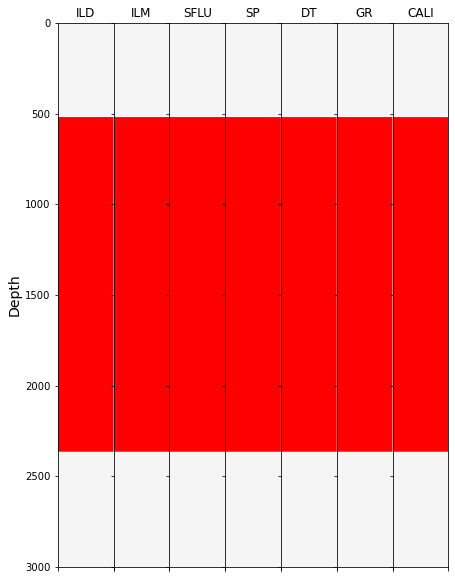

In [12]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(3000, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

## Plotting Log Data
Finally, we can plot our data using the code below. Essentially, the code is building up a series of subplots and plotting the data on the relevant tracks.  
  
When we add curves to the tracks, we need to set the curve's properties, including the limits, colour and labels. We can also specify the shading between curves. An example has been added to the caliper curve to show shading between a bitsize value (8.5") and the CALI curve.  
  
If there are a number of features that are common between the plots, we can iterate over them using a for loop.

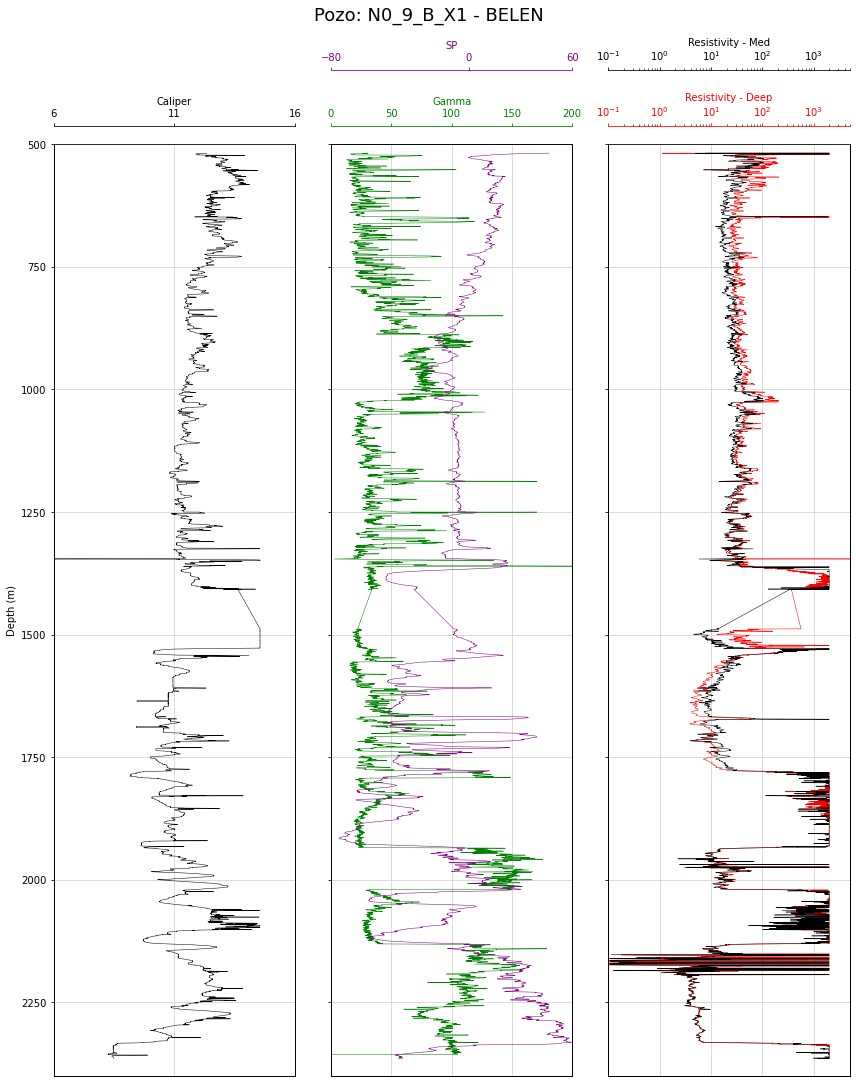

In [13]:
fig, ax = plt.subplots(figsize=(12,15))

# Create a dictionary of formations with a top and bottom depth
formations = {"A":[470, 900], 
              "B": [900, 1370],
              "C": [1370, 1553],
              "D": [1553, 1668],
              "E": [1668, 1778]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]




#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
#ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax4.twiny()
ax6 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# Caliper track
ax1.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Caliper")
ax1.set_xlim(6, 16)
ax1.set_ylabel("Depth (m)")
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
#ax1.fill_betweenx(well_nan.index, 8.0, well["CALI"], facecolor='yellow')
ax1.set_xticks([6,  11, 16])


# Gamma Ray track
ax2.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
#ax1.fill_betweenx(well_nan.index, well["GR"], 200, facecolor='yellow')

# Resistivity track
ax4.plot(well["ILD"], well.index, color = "red", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Deep")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()

# Resistivity track - Curve 2
ax7.plot(well["ILM"], well.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Spontaneous Potencial
ax6.plot(well["SP"], well.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax4]:
    ax.set_ylim(2400, 500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)


fig.suptitle(tituloPozo, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
plt.savefig(nombrePozo + ".jpg")
plt.show()

Guardamos dataFrame como XLSX

In [14]:
well.to_excel(nombrePozo + '.xlsx')

## Ploteo con litología


In [15]:
dfLito = pd.read_excel('Litología.xlsx')

In [16]:
Fms = dfLito[['Fm', 'Tope']].groupby(['Fm']).first()
Fms['Base']= dfLito[['Fm', 'Base']].groupby(['Fm']).last()
Fms.reset_index(inplace=True)
Fms


,Fm,Tope,Base
0,Arapey,18,477
1,Buena Vista,885,1671
2,Paso Aguiar,1671,2130
3,Salto,0,18
4,Tacuarembó,477,885


In [17]:
#Diccionario para granulometría
dictGran = {'cl':0.55,
              's':0.6,
              'vf':0.65,
              'f':0.7,
              'm':0.75,
              'c':0.8,
              'vc':0.85,
              'g':0.9}


#Diccionario para granulometría
dictLito = {'C':100,
            'M':200,
            'B':300,
            'S':400,
            'SM':450,
            'SC':475,
            'SG':490,
            'G':500,
            'D':600}

dfLito['Litología'] = dfLito['Litología'].map(dictLito)
dfLito['Gran'] = dfLito['Granulometría'].map(dictGran)
dfLito['Gran'].fillna(1, inplace=True) 
dfLito.head()

,Pozo,Fm,Tope,Base,Espesor,Litología,Granulometría,Estructuras,Fósiles,Descripción,Gran
0,NaN,Salto,0,0,0,100.0,NaN,NaN,NaN,NaN,1.0
1,NaN,Salto,0,3,3,100.0,NaN,NaN,NaN,NaN,1.0
2,NaN,Salto,3,3,0,200.0,s,NaN,NaN,NaN,0.6
3,NaN,Salto,3,15,12,200.0,s,NaN,NaN,NaN,0.6
4,NaN,Salto,15,15,0,200.0,s,NaN,NaN,NaN,0.6


In [18]:
im = plt.imread('Images/Amo.png')
rip =  plt.imread('Images/ripple.png')

In [19]:
lithologys = {400: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
              450: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#e8e800'},
              475: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#cfcf02'},
              490: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#b3b302'},
                 100: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 86000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 65030: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 200: {'lith':'Mudstone', 'lith_num':9, 'hatch':'', 'color':'#9c793e'},
                 600: {'lith':'Diabase', 'lith_num':10, 'hatch':'-|', 'color':'#144513'},
                 300: {'lith':'Basalt', 'lith_num':11, 'hatch':'', 'color':'#144513'},
                 500: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

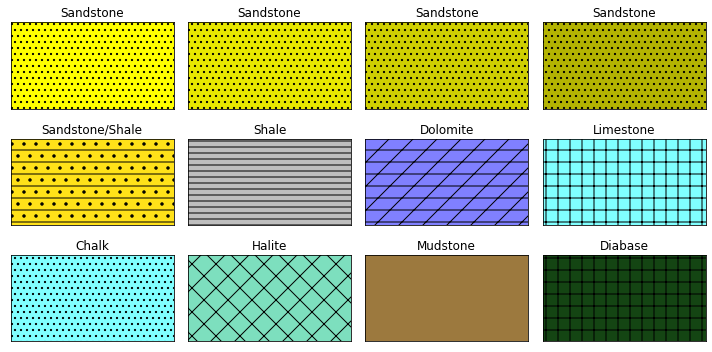

In [20]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithologys.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithologys[key]['color'], hatch=lithologys[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithologys[key]['lith']))

plt.tight_layout()

plt.show()


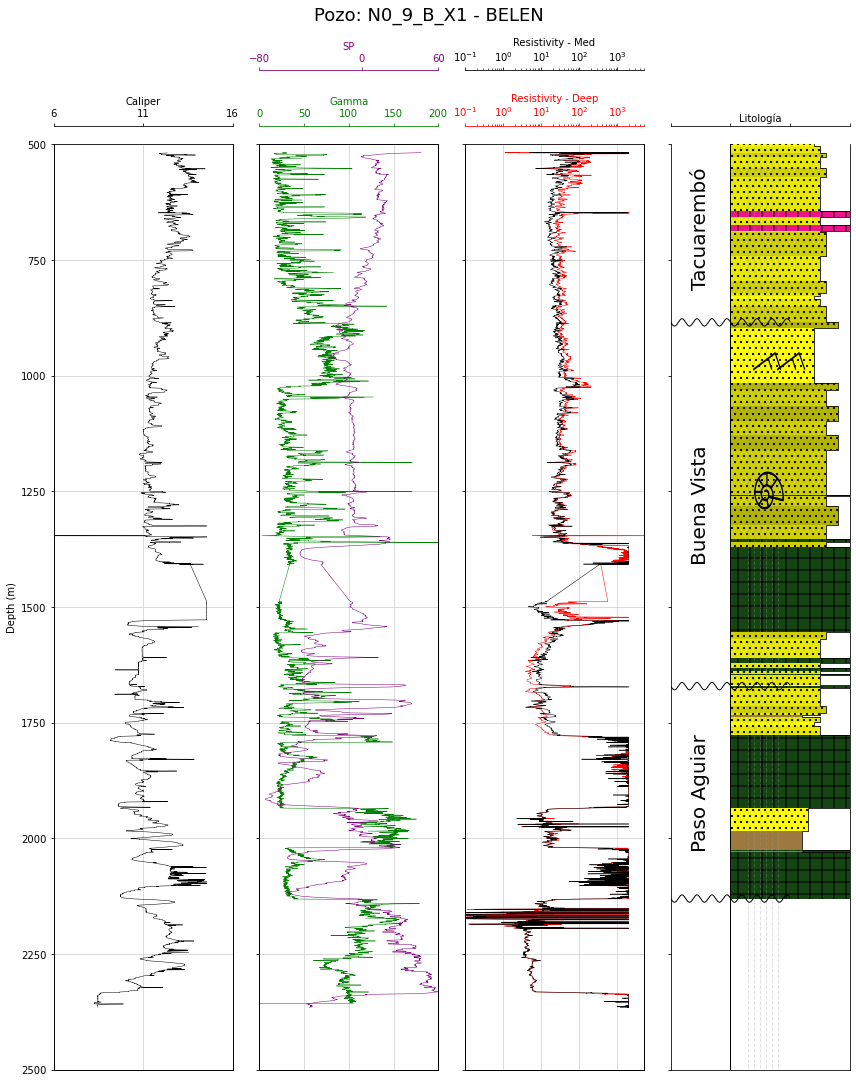

In [29]:
%matplotlib inline 
#%matplotlib qt 

TOP = 500
BOTTOM = 2500


XXXX=0.5

granos = [1,0.6,0.5,0.5]



fig, ax = plt.subplots(figsize=(12,15))

# Create a dictionary of formations with a top and bottom depth
formations = {"A":[470, 900], 
              "B": [900, 1370],
              "C": [1370, 1553],
              "D": [1553, 1668],
              "E": [1668, 1778]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]




#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
axL = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
#ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax4.twiny()
ax6 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# Caliper track
ax1.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Caliper")
ax1.set_xlim(6, 16)
ax1.set_ylabel("Depth (m)")
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
#ax1.fill_betweenx(well_nan.index, 8.0, well["CALI"], facecolor='yellow')
ax1.set_xticks([6,  11, 16])


# Gamma Ray track
ax2.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
#ax1.fill_betweenx(well_nan.index, well["GR"], 200, facecolor='yellow')

# Resistivity track
ax4.plot(well["ILD"], well.index, color = "red", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Deep")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()

# Resistivity track - Curve 2
ax7.plot(well["ILM"], well.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Spontaneous Potencial
ax6.plot(well["SP"], well.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])


axL = plotLito(dfLito, TOP, BOTTOM)

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax4, axL]:
    ax.set_ylim(BOTTOM, TOP)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax4, ax6, axL]:
    plt.setp(ax.get_yticklabels(), visible = False)

plt.setp(axL.get_xticklabels(), visible = False)
axL.grid(False)

fig.suptitle(tituloPozo, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
plt.savefig(nombrePozo + "litologia" + ".jpg")
plt.show()

In [206]:
#Función para el ploteo de perfíl litológico
'''
Tenemos que sumar:
    -Eras geológicas
    -Períodos
    -Escaldo de fósiles
    -Tipo de contacto
    -Dos litolgías
    -suavizar curva
    -
'''







#Parámetros:
    #tope, base,
    
def plotLito(dfLito, tope, base, **kwargs):
    #Variables **kwargs por defecto:
    show_fm = False
    show_gr = False
    show_fossils = False
    show_era = False
    color_fill = False
    fm_rot = 90
    fm_size = 20
    x_plot = 0
    escala = (base - tope)/2500
        
       
    for key, value in kwargs.items():
        if (key == 'show_fm') & (value == 'True'):
            show_fm = True
            Fms = dfLito[['Fm', 'Tope']].groupby(['Fm']).first()
            Fms['Base']= dfLito[['Fm', 'Base']].groupby(['Fm']).last()
            Fms.reset_index(inplace=True)
            x_plot +=0.5
        if (key == 'show_gr') & (value == 'True'):
            show_gr = True
        if (key == 'color_fill') & (value == 'True'):
            color_fill = True
        if (key == 'show_fossils') & (value == 'True'):
            show_fossils = True
        if (key == 'fm_rot'):
            fm_rot = value
        if (key == 'fm_size'):
            fm_size = value
            
       
    # Lithology track
    axL.plot(dfLito["Litología"], dfLito['Base'], color = "black", linewidth = 0.5)
    axL.set_xlabel("Litología")
    axL.set_xlim(0, x_plot+1)
    axL.xaxis.label.set_color("black")
    axL.tick_params(axis='x', colors="black")
    axL.spines["top"].set_edgecolor("black")
    
    
    
    
    #Ploteo de granulometrías
    if show_gr:
        axL.vlines(x=x_plot, ymin=0, ymax=4000, colors='black', ls='-', lw=1, label='vline_single - full height',alpha = 1, zorder = 5)
        axL.vlines(x=x_plot+0.65, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3, zorder = 5)
        axL.vlines(x=x_plot+0.7, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
        axL.vlines(x=x_plot+0.75, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
        axL.vlines(x=x_plot+0.8, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
        axL.vlines(x=x_plot+0.85, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
        axL.vlines(x=x_plot+0.9, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
        axL.plot(x_plot+dfLito['Gran'],dfLito['Base'], color="black", zorder =10, lw=0.8)
    
    pos1 =1100
    pos2 =1300
    if show_fossils:
        axL.imshow(rip, extent=[x_plot+0.15,x_plot+0.45,pos1,(pos1-(pos1/10)*(2*escala))], aspect='auto', zorder=20)
        axL.imshow(rip, extent=[x_plot+0.35,x_plot+0.65,pos1,(pos1-(pos1/10)*(2*escala))], aspect='auto', zorder=20)
        axL.imshow(im, extent=[x_plot+0.2,x_plot+0.45,pos2,(pos2-(pos2/10)*escala)], aspect='auto', zorder=20)

    #Ploteamos las Formaciones
    if show_fm:
        x = np.arange(0,1,0.001)   # start,stop,step
        y = np.sin(50*x)
        bbox_props = dict(boxstyle="Round, pad=0.8", fc="w", ec="0.5", alpha=0.0)
        for i in range(len(Fms)):
            if (Fms.iloc[i,2] > tope) & (Fms.iloc[i,1] < base):
                x_tope = Fms.iloc[i,1] if Fms.iloc[i,1] > tope else tope
                x_base = Fms.iloc[i,2] if Fms.iloc[i,2] < base else base                
                axL.text(0.25, (x_tope+x_base)/2, Fms.iloc[i,0], 
                    ha="center", va="center", size=fm_size,
                    bbox=bbox_props, zorder=1,rotation=fm_rot)
                #axL.hlines(y=Fms.iloc[i,2], xmin=0, xmax=2, colors='black', ls='-', lw=1, label='vline_single - full height',zorder = 5)
                axL.plot(x,Fms.iloc[i,2]+escala*8*y, color="black", zorder =10, lw=1)

                
    #Ploteamos Eras
    if show_era:
        x = np.arange(0,1,0.001)   # start,stop,step
        y = np.sin(50*x)
        bbox_props = dict(boxstyle="Round, pad=0.8", fc="w", ec="0.5", alpha=0.0)
        for i in range(len(Fms)):
            if (Fms.iloc[i,2] > tope) & (Fms.iloc[i,1] < base):
                x_tope = Fms.iloc[i,1] if Fms.iloc[i,1] > tope else tope
                x_base = Fms.iloc[i,2] if Fms.iloc[i,2] < base else base                
                axL.text(0.25, (x_tope+x_base)/2, Fms.iloc[i,0], 
                    ha="center", va="center", size=fm_size,
                    bbox=bbox_props, zorder=1,rotation=fm_rot)
                #axL.hlines(y=Fms.iloc[i,2], xmin=0, xmax=2, colors='black', ls='-', lw=1, label='vline_single - full height',zorder = 5)
                axL.plot(x,Fms.iloc[i,2]+escala*8*y, color="black", zorder =10, lw=1)

                
    
    #Relleno de las Formaciones
    for key in lithologys.keys():
        color = lithologys[key]['color'] if color_fill else '#FF000000'
        hatch = lithologys[key]['hatch']
        axL.fill_betweenx(dfLito['Base'], x_plot, x_plot+(dfLito['Gran'] if show_gr else 2)
                          , where=(dfLito['Litología']==key),
                         facecolor=color, hatch=hatch)
        
       
    return axL
    

1100
985.6
880.0


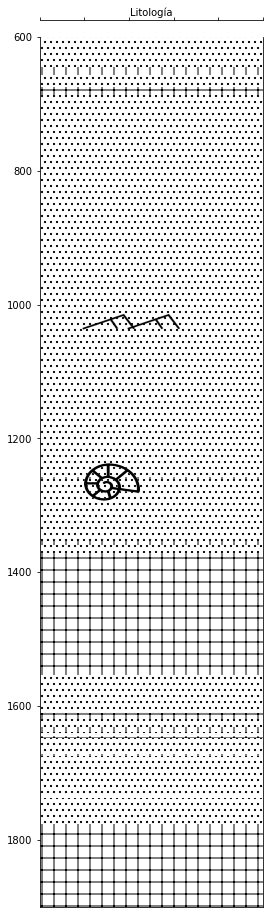

In [209]:
fig, axL = plt.subplots(figsize=(4,16))
tope = 600
base = 1900




axL = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1)

axL = plotLito(dfLito, tope, base, 
               show_fm='False', 
               show_gr='False', 
               show_fossils='True', 
               color_fill = 'False')


axL.set_ylim(base, tope)
axL.grid(which='major', color='lightgrey', linestyle='-')
axL.xaxis.set_ticks_position("top")
axL.xaxis.set_label_position("top")
axL.spines["top"].set_position(("axes", 1.02))
plt.setp(axL.get_xticklabels(), visible = False)
axL.grid(False)

plt.show()


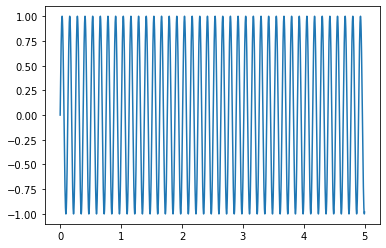

In [202]:
x = np.arange(0,5,0.001)   # start,stop,step
y = np.sin(50*x)

plt.plot(x,y)
plt.show()

In [149]:
escala = (base - tope)/2500
escala

1.0

### Comenzamos predicciones

In [22]:
df = pd.read_excel("FCIEN/Pozo N0_9_B_X1 - BELEN.xlsx")

In [23]:
workingdf = df[["DEPT:2", "ILD", "ILM", "SFLU", "SP", "GR"]].copy()

In [24]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [25]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [44]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot) + 1
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    axL = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1, sharey = ax1)
    # Lithology track
    axL.plot(dfLito["Litología"], dfLito['Base'], color = "black", linewidth = 0.5)
    axL.set_xlabel("Litología")
    axL.set_xlim(0, 1)
    axL.xaxis.label.set_color("black")
    axL.tick_params(axis='x', colors="black")
    axL.spines["top"].set_edgecolor("black")
    # single vline with full ymin and ymax
    axL.vlines(x=0.65, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3, zorder = 5)
    axL.vlines(x=0.7, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
    axL.vlines(x=0.75, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
    axL.vlines(x=0.8, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
    axL.vlines(x=0.85, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)
    axL.vlines(x=0.9, ymin=0, ymax=4000, colors='#999999', ls='--', lw=1, label='vline_single - full height',alpha = 0.3,zorder = 5)

    axL.hlines(y=cambios, xmin=0, xmax=granos, colors='#999999', ls='-', lw=1, label='vline_single - full height',alpha = 0.5,zorder = 5)
    axL.plot(dfLito['Gran'],dfLito['Base'], color="black", zorder =10, lw=0.8)

    for key in lithologys.keys():
        color = lithologys[key]['color']
        hatch = lithologys[key]['hatch']
        axL.fill_betweenx(dfLito['Base'], 0, dfLito['Gran'], where=(dfLito['Litología']==key),
                         facecolor=color, hatch=hatch)  
    
    plt.tight_layout()
    plt.savefig("KNN.jpg")
    plt.show()
    
    return cmap_facies

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [28]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [29]:
workingdf.dropna(inplace=True)

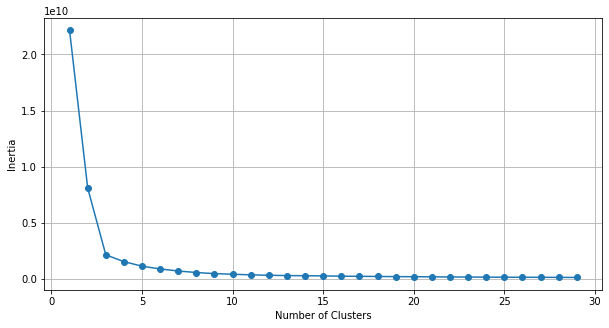

In [30]:
optimise_k_means(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']], 30)

In [56]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

In [57]:
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Predict the labels
gmm_labels = gmm.predict(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Assign the labels back to the workingdf
workingdf['GMM'] = gmm_labels

<ipython-input-44-c16e79eacdfb>:79: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


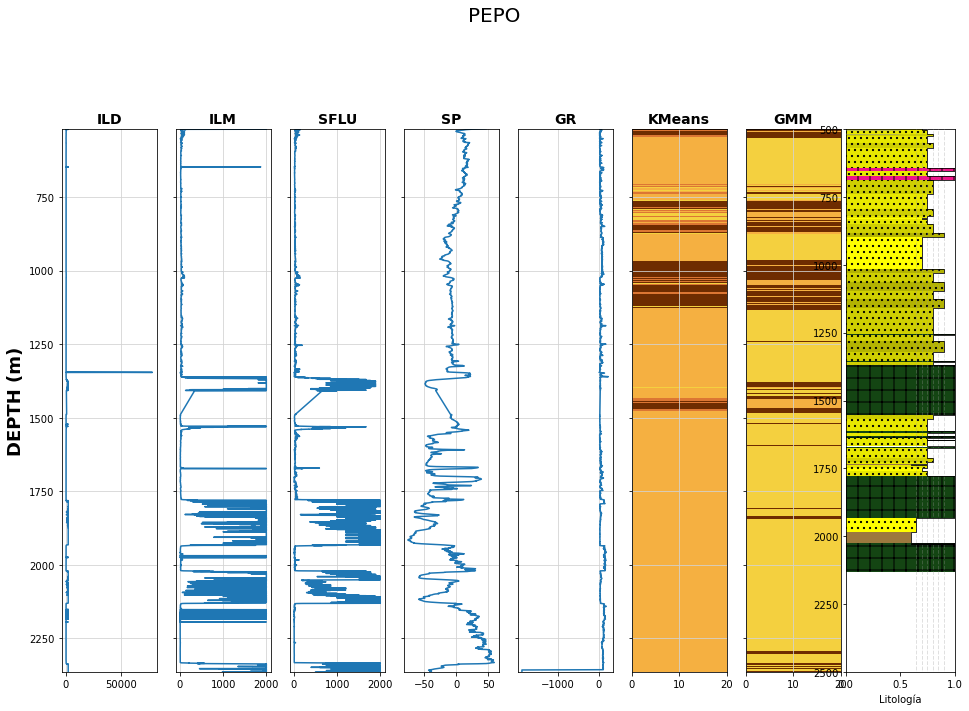

In [59]:
# Setup the curves to plot
curves_to_plot = ['ILD', 'ILM', 'SFLU', 'SP', 'GR', 'KMeans','GMM']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans','GMM']

# Create plot by passing in the relevant well index numberb
cmap_facies = create_plot('PEPO', 
            workingdf, 
            curves_to_plot, 
            workingdf['DEPT:2'], 
            logarithmic_curves, facies_curve)

In [37]:
dfLito

,Pozo,Tope,Base,Espesor,Litología,Granulometría,Estructuras,Fósiles,Descripción,Gran
0,NaN,0,0,0,100.0,NaN,NaN,NaN,NaN,1.0
1,NaN,0,3,3,100.0,NaN,NaN,NaN,NaN,1.0
2,NaN,3,3,0,200.0,s,NaN,NaN,NaN,0.6
3,NaN,3,15,12,200.0,s,NaN,NaN,NaN,0.6
4,NaN,15,15,0,200.0,s,NaN,NaN,NaN,0.6
...,...,...,...,...,...,...,...,...,...,...
369,NaN,2094,2128,34,600.0,NaN,NaN,NaN,NaN,1.0
370,NaN,2128,2128,0,600.0,NaN,NaN,NaN,NaN,1.0
371,NaN,2128,2130,2,600.0,NaN,NaN,NaN,NaN,1.0
372,NaN,2130,2130,0,600.0,NaN,NaN,NaN,NaN,1.0
